# CW7 Spanish Load shortfall predict

#

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Our has been asked to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

:

Importing packages:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.express as px
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import  Ridge
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso,\
LassoLars, BayesianRidge
import seaborn as sns

# Loading data

In [ ]:
df = pd.read_csv('df_train.csv')


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [ ]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [ ]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


Looking at normality of data we can see that most of the data is non normal so normal probability infereances may not give accurate results. Many features of the dataset have high kurtosis. Higher kurtosis means more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations

In [ ]:
df.kurtosis()

C:\Users\Ozzey\AppData\Local\Temp\ipykernel_2660\615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Lets look at the correlation of our data

In [ ]:
# Find the correlations between the load shortfall  and the rest of the features
correlations = df.corr(method='pearson')
print(correlations['load_shortfall_3h'].sort_values(ascending=False).to_string())

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Barcelona_temp_min      0.195984
Unnamed: 0              0.192612
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_pressure       0.076012
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_ra

We  can find outliers in our data with the following code and for example we can look at the outliers for Madrid_pressure

In [ ]:
sns.boxplot(df.Madrid_pressure)

NameError: name 'df' is not defined

In [ ]:
df.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.950715
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

<AxesSubplot:>

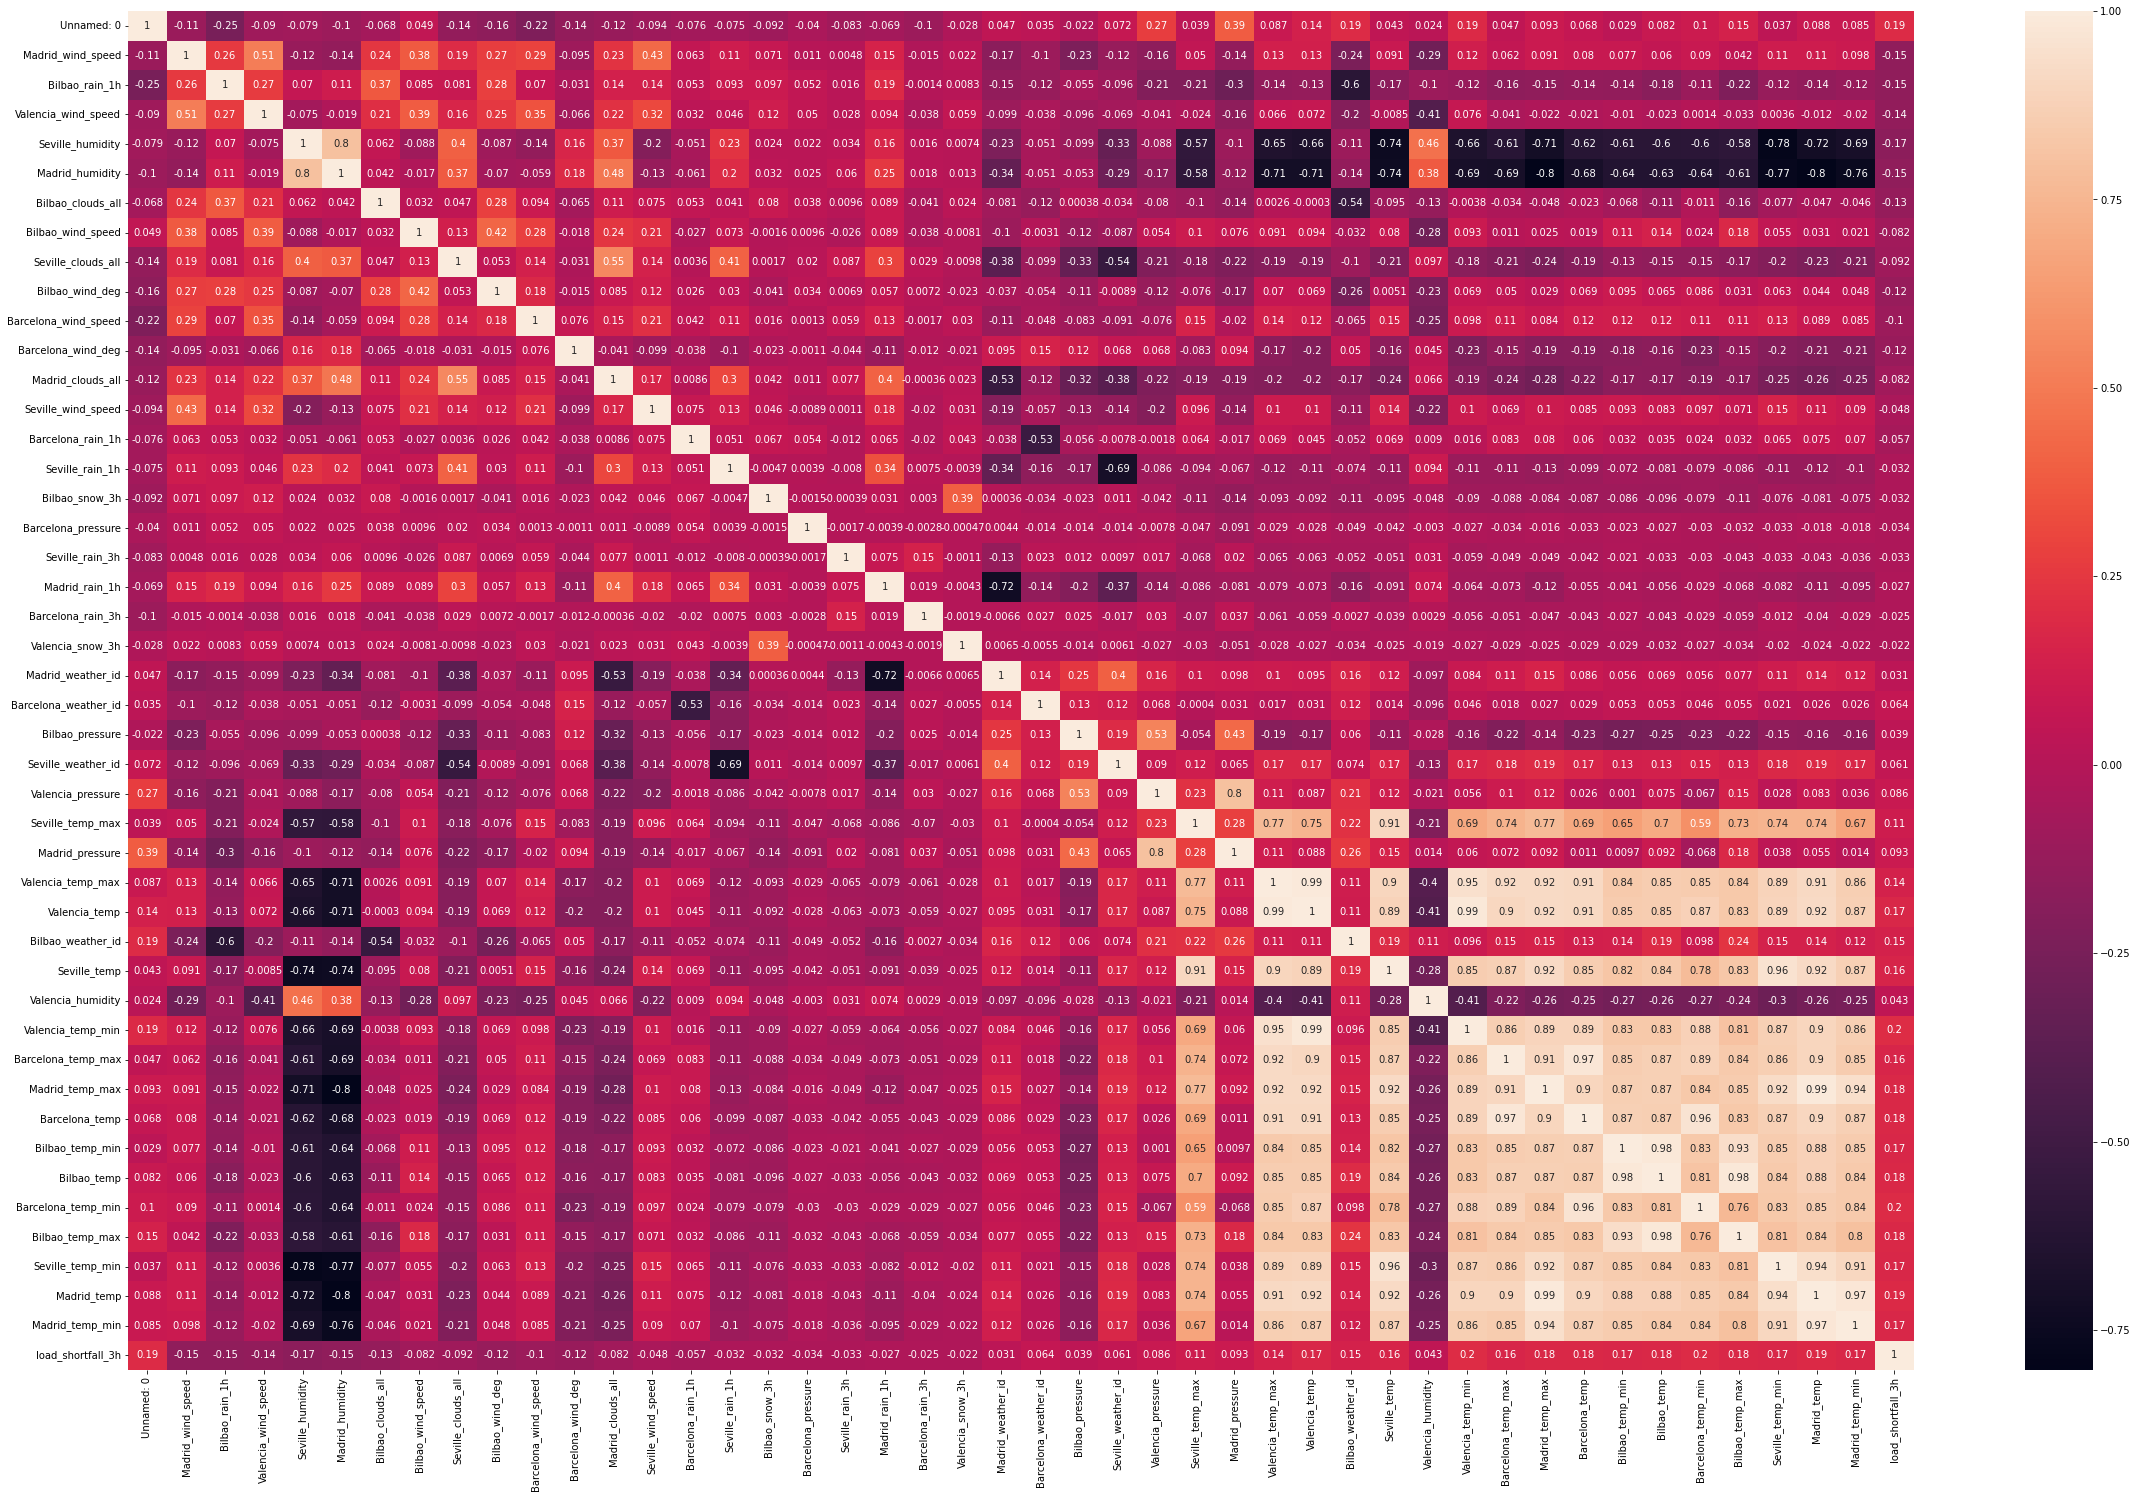

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(df.corr(),annot=True,vmin=-1, vmax=1, cmap='Blues')
#sns.heatmap(df_corr,annot=True, vmin=-1, vmax=1, cmap='Blues')

Lets try to interpret the above matrix as we see there are many features with high correlation

In [ ]:
highly_correlated = abs(correlations[correlations > 0.75])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

Seville_humidity    Madrid_humidity       0.799831
Madrid_humidity     Seville_humidity      0.799831
Seville_temp_max    Valencia_temp_max     0.771964
                    Seville_temp          0.907261
                    Madrid_temp_max       0.772369
Valencia_temp_max   Seville_temp_max      0.771964
                    Valencia_temp         0.987533
                    Seville_temp          0.896059
                    Valencia_temp_min     0.949377
                    Barcelona_temp_max    0.918256
                    Madrid_temp_max       0.917838
                    Barcelona_temp        0.912094
                    Bilbao_temp_min       0.840573
                    Bilbao_temp           0.854592
                    Barcelona_temp_min    0.845057
                    Bilbao_temp_max       0.837574
                    Seville_temp_min      0.886449
                    Madrid_temp           0.911331
                    Madrid_temp_min       0.862683
Valencia_temp       Valencia_te

As we can see from above most of the correlated features are the tempratures from the different cities

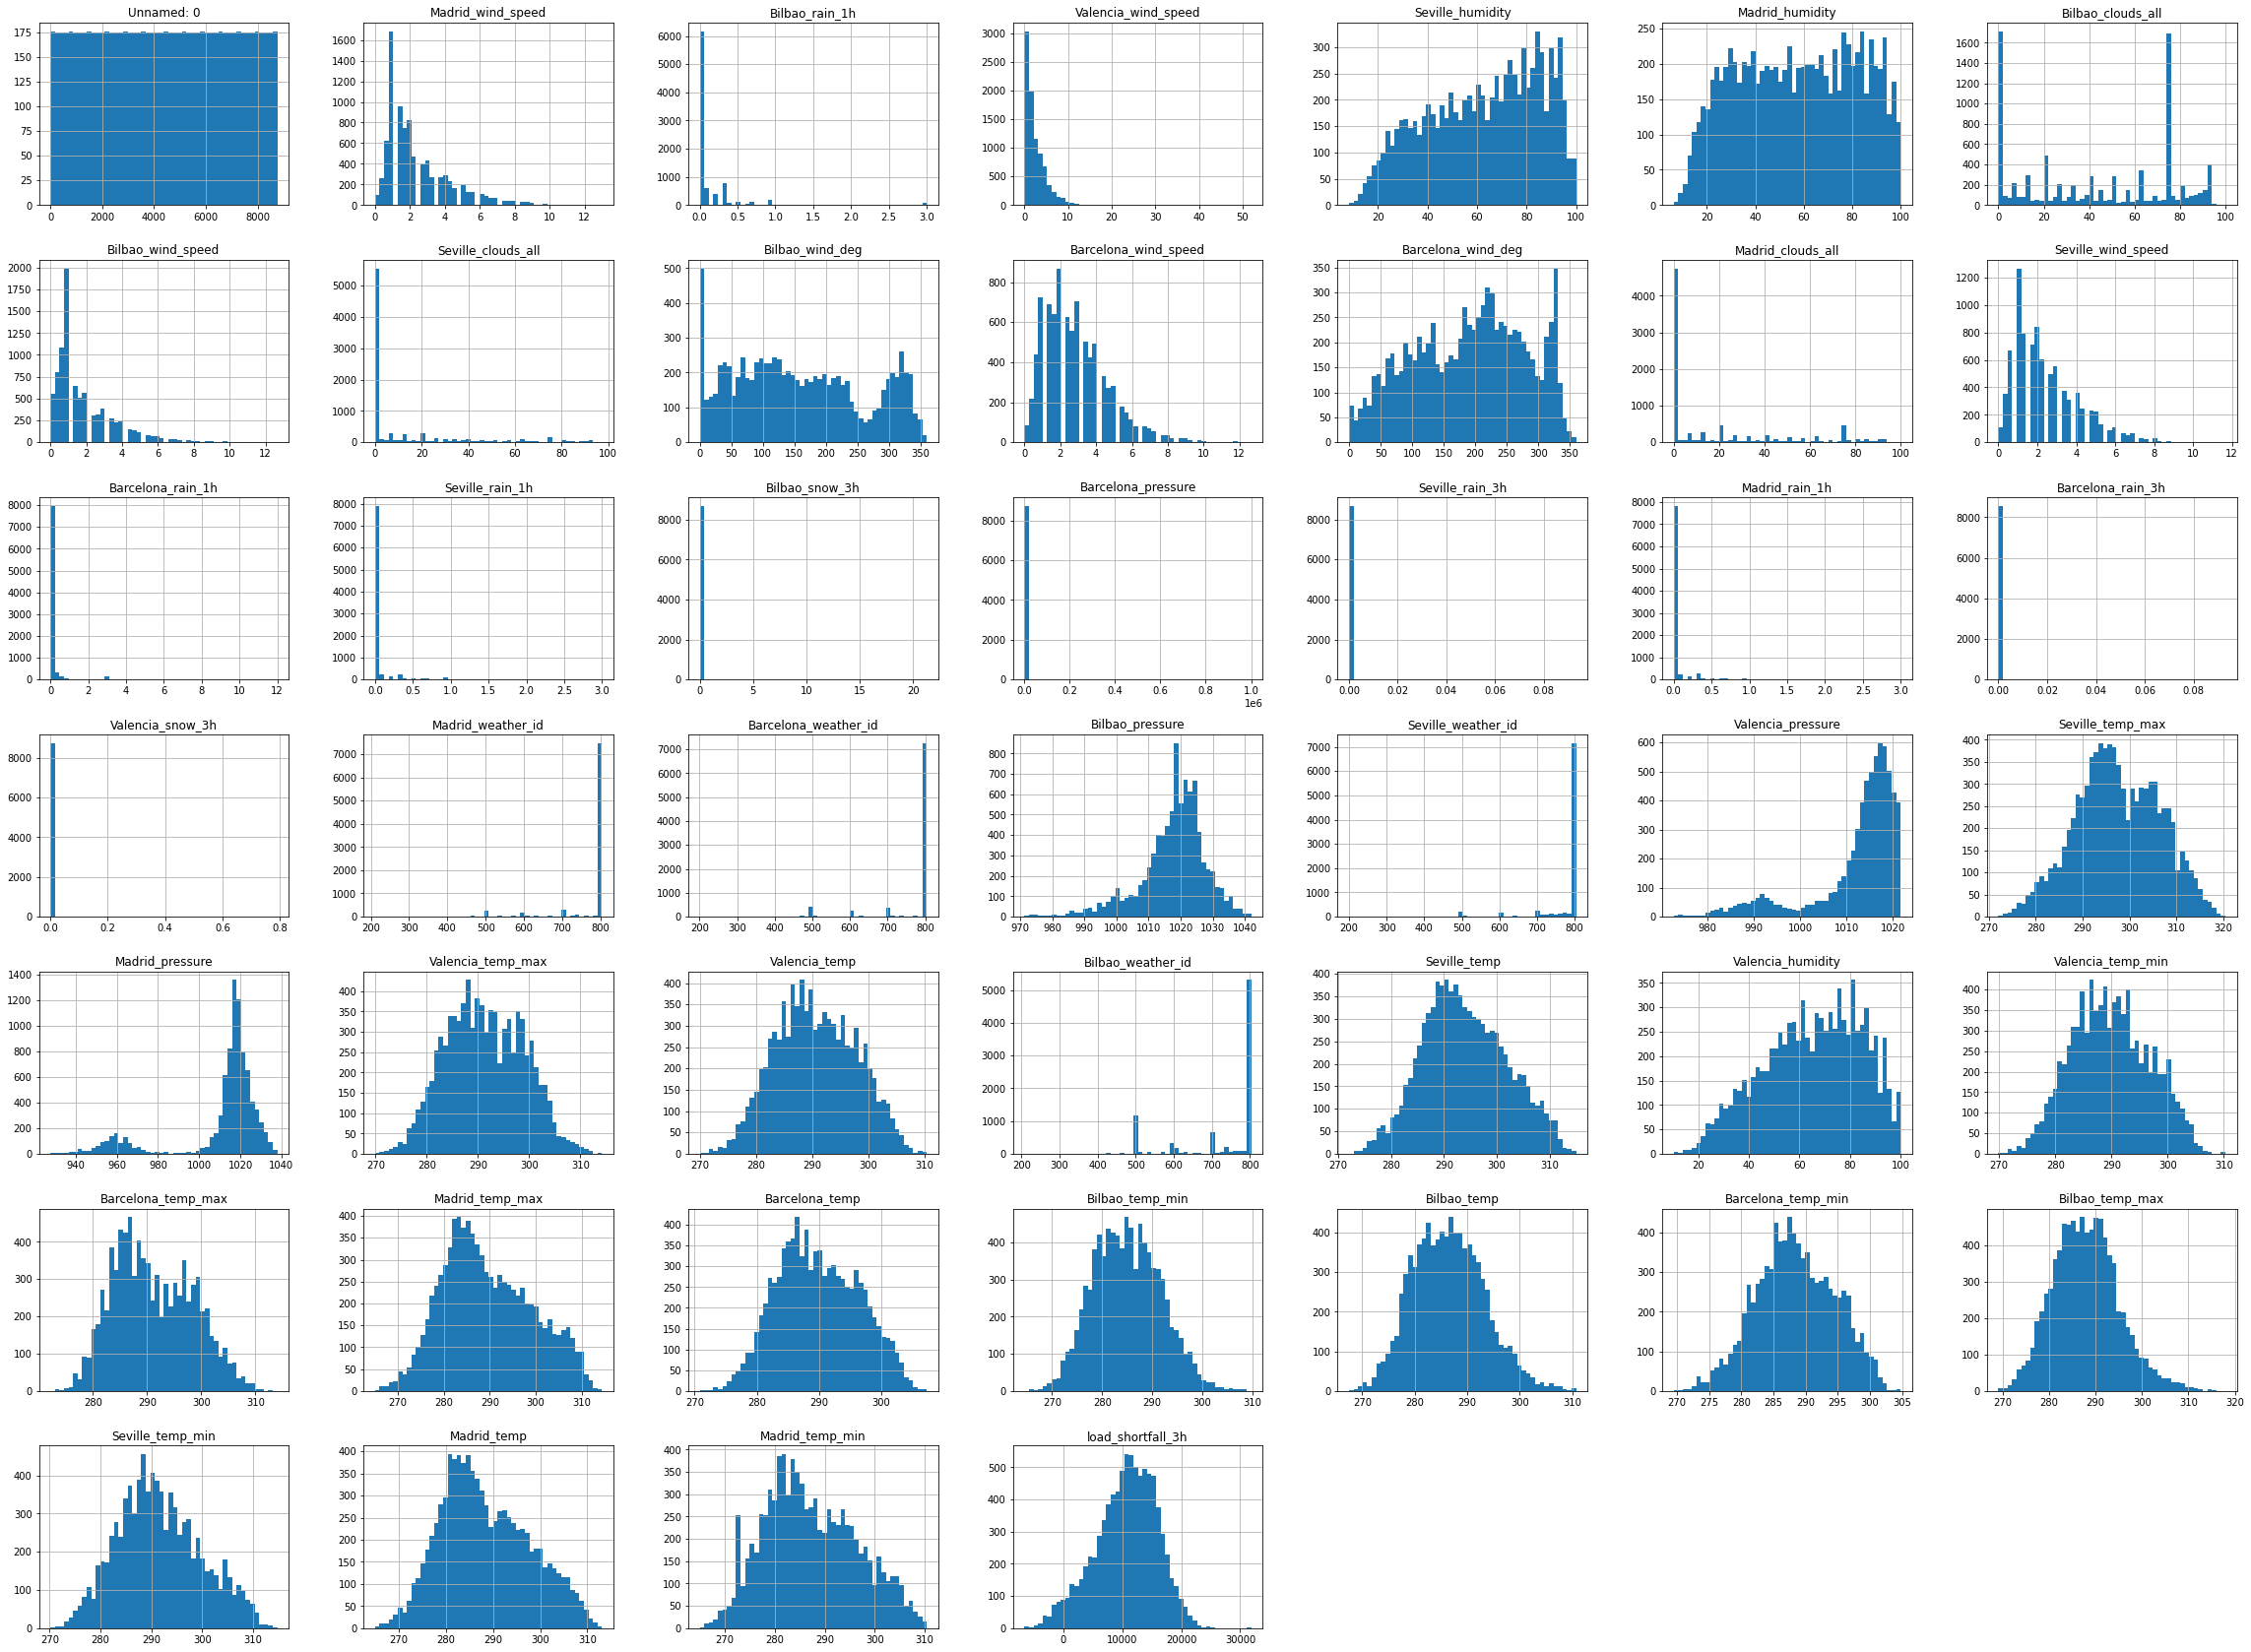

In [ ]:
df.hist(bins=50, figsize=(40,30), color = 'tab:blue')
plt.show()

**Useful visualizations and insights**

Lets plot 'time' vs 'load_shortfall_3h', to see the fluctuation in the shortfall over the observed period

<AxesSubplot:xlabel='time'>

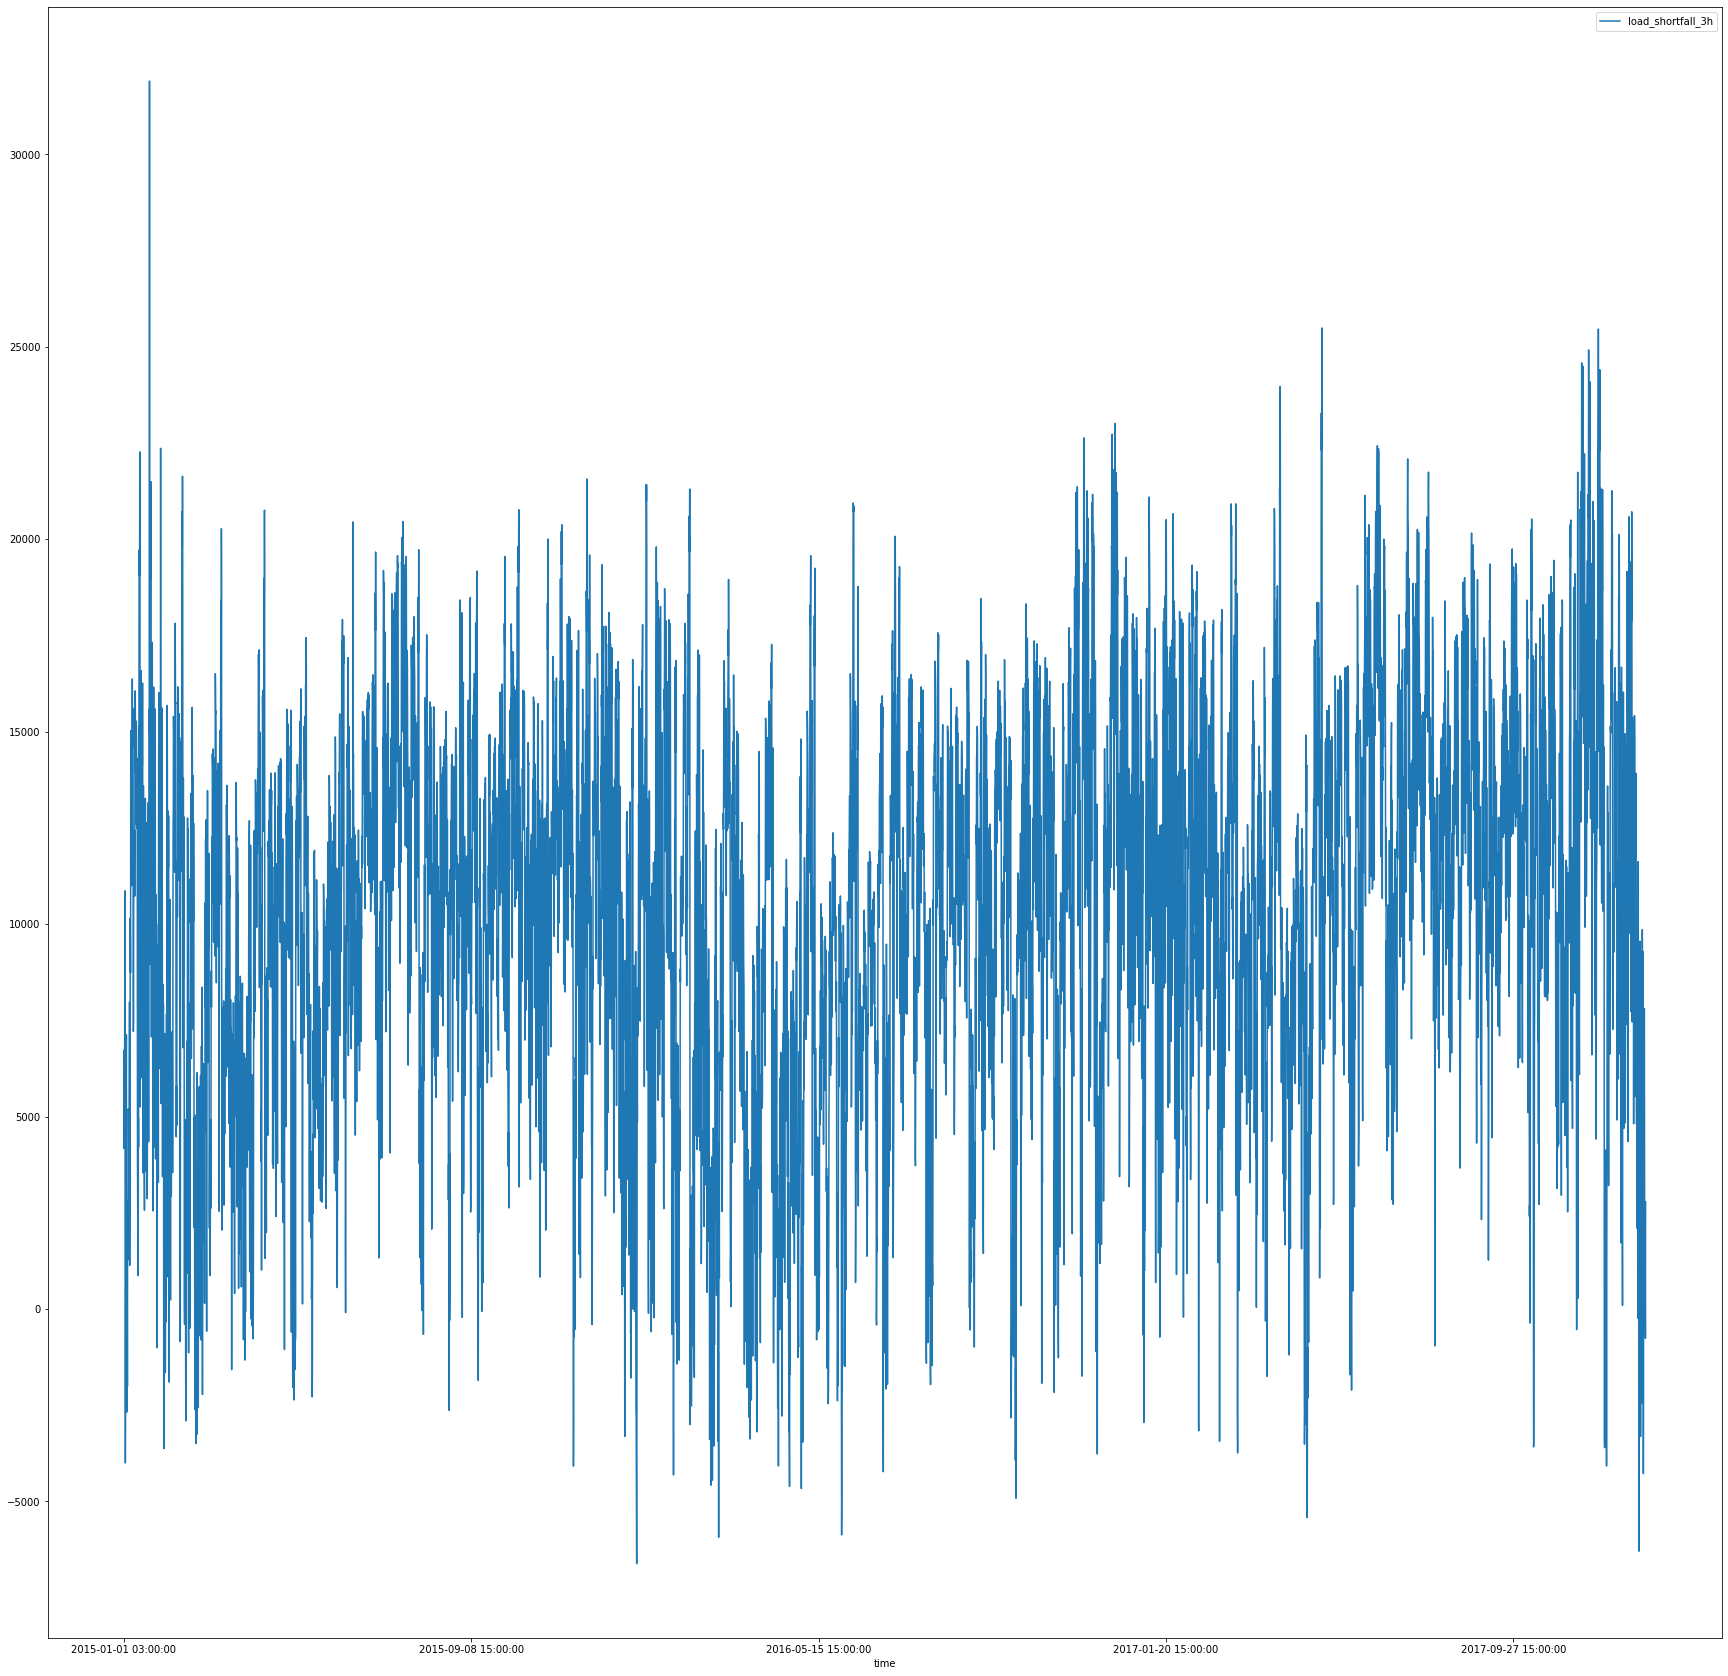

In [ ]:
df.plot(x='time',y='load_shortfall_3h',figsize=(30,30))

As we can see from the output above, the shortfall fluctuates throughout the years. This could be because of reasons like weather,energy prices, energy generation capacity, global warming or even just maintenace of the power plants.

c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='load_shortfall_3h', ylabel='Density'>

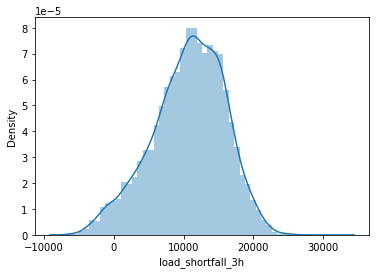

In [ ]:
sns.distplot(df['load_shortfall_3h'])

# Data Engineering 

We will use linear and non-linear models to try and predict load_shortfall_3h. Most ML models in this category of models dont deal well with categorical data so we will drop the features that have categorical data.

In [ ]:
df.drop(['time','Unnamed: 0','Seville_pressure','Valencia_wind_deg'] , axis=1 , inplace=True)

We notice that Valencia_pressure has many NaN values. Lets impute them with the mode as pressure is something that mostly stays the same in one area. 

In [ ]:
df["Valencia_pressure"] = df["Valencia_pressure"].replace(np.NaN, df["Valencia_pressure"].mean())
print(df["Valencia_pressure"])


0       1002.666667
1       1004.333333
2       1005.333333
3       1009.000000
4       1012.051407
           ...     
8758    1012.051407
8759    1021.000000
8760    1009.666667
8761    1020.000000
8762    1012.051407
Name: Valencia_pressure, Length: 8763, dtype: float64


Lets see is there are any NaNs left

In [ ]:
df.Valencia_pressure.isna().sum()

0

# Modelling

Multiple linear regression:

In [ ]:
#Calling the linear regression object
lr = LinearRegression()

#X and y split
X= df[['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min']]
y = df.load_shortfall_3h

#Scale X values to be of comprable scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Fit the model
lr.fit(X_train,y_train)

#get predicted values
lr_predict = lr.predict(X_test)

Ridge:

In [ ]:
# Creating Ridge model
rr = Ridge()
# Train the model
rr.fit(X_train, y_train)
# Get predictions
Ridge_pred = rr.predict(X_test)
Ridge_pred


array([ 9738.66666668,  7209.66666668, 13965.99999998, ...,
        -206.6666666 ,  7045.66666668, 11878.66666667])

LASSO:

In [ ]:
#Create the model
ls = Lasso(alpha=0.02)
#Fit the data
ls.fit(X,y)
#Get predictions
ls_predict = ls.predict(X_test)

c:\Users\Ozzey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+11, tolerance: 2.386e+07
  model = cd_fast.enet_coordinate_descent(


Lasso Lars:

In [ ]:
# lassoLars_model_1

lassoLars_model_1 = LassoLars(alpha=.1, normalize=False)
lassoLars_model_1.fit(X_train,y_train)
lassoLars_model_1_pred = lassoLars_model_1.predict(X_test)

Decision Trees:

In [ ]:
#calling the object
Dec_tree = DecisionTreeRegressor()
# Fitting the model
Dec_tree.fit(X_train,y_train)
# Get predictions
Tree_pred = Dec_tree.predict(X_test)


Random Forest:

In [ ]:
#calling the object
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
random_forest = rf.fit(X ,y )
# Get predictions
rf_pred = random_forest.predict(X_test)


# Model performance and evaluation

In this section the perfomamce of the algorithm/model is evaluated. This step is particularly important to compare how well the  different algorithms perform on a particular dataset. 
For regression algorithms: 
- Mean Squared Error : There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
- Root Mean Squared Error
- R2 score (score varies between 0 and 100, 100 is perfect correlateld)

In [ ]:
print("R2 score Linear : %.2f" % metrics.r2_score(y_test,lr_predict))
print("R2 score Ridge : %.2f" % metrics.r2_score(y_test,Ridge_pred))
print("R2 score Lasso : %.2f" % metrics.r2_score(y_test,ls_predict))
print("R2 score Desicion tree : %.2f" % metrics.r2_score(y_test,Tree_pred))
print("R2 score Random Forest: %.2f" % metrics.r2_score(y_test,rf_pred))

R2 score Linear : 0.11
R2 score Ridge : -1.02
R2 score Lasso : 0.12
R2 score Desicion tree : -0.49
R2 score Random Forest: 0.19


In [ ]:
# Compare model performance
from sklearn import metrics
import math
r_dict = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,lr_predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_squared_error(y_test,ls_predict)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,rf_pred))}
                        
                    }

# create dataframe from dictionary
r = pd.DataFrame(data=r_dict)
r

,Test MSE
Decision Tree,3.950528e+07
Lasso,2.330392e+07
Linear model,2.359312e+07
Random Forest,2.137382e+07
Ridge,5.368848e+07


In [ ]:
Model_Performance_dict = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,lr_predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,ls_predict)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,rf_pred))}
                        
                    }
# create dataframe from dictionary
results = pd.DataFrame(data=Model_Performance_dict)
results

,Test RMSE
Decision Tree,6285.322612
Lasso,4827.413123
Linear model,4857.275109
Random Forest,4623.182876
Ridge,7327.242618


From the above results we can conclude that the random forest model is the best fit. From the above model performance testing we have seen that Random Forest has a lower RMSE for the Test data as compared to the other models. 

Therefore it is evident that the Random Forest model outperforms the other models, and we can conclude that Random Forest is the best model to use for prediction of 3 hourly load shortfall in Spain


# Explaning the model

As we assumed the non linear model performs the best, that being the Random forest model as it fits better. Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression.

Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model

Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

Therefore, in random forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. You can even make trees more random by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).
